In [1]:
from Bio import SeqIO
import glob
import re

In [2]:
#create list of reference genbank files
gb_files = glob.glob("*.gb")
gb_files

['ASO1A(2SW1)_Final_exported from Sequin.gb',
 'Salmonella phage BPS15Q2, complete genome.gb',
 'Escherichia coli O157 typing phage 1, complete genome.gb',
 'Enterobacteriaphage UAB_Phi87.gb',
 'Salmonella phage vB_SPuM_SP116, complete genome.gb',
 'Escherichia phage vB_EcoM-VpaE1, complete genome.gb',
 'Escherichia phage EC6, complete genome.gb',
 'Salmonella phage Mushroom, complete genome.gb',
 'Enterobacteria phage WV8, complete genome.gb',
 'Escherichia phage vB_EcoM_Alf5, complete genome.gb',
 'Escherichia phage vB_EcoM_AYO145A, complete genome.gb',
 'Escherichia phage HY02, complete genome.gb',
 'Salmonella phage BPS17W1, complete genome.gb',
 'Salmonella phage BPS17L1, complete genome.gb',
 'ASO1B(2SW2)_Final_exported from Sequin.gb',
 'Escherichia phage JH2, complete genome.gb']

In [3]:
## grab coding regions from genbank - and translate
for file in gb_files:
    infile= file
    outfile = infile.split('.')[0]+ '.faa'
    input_handle  = open(infile, "r")
    output_handle = open(outfile, "w")
    file_name = infile.split('.')[0]
    
    for seq_record in SeqIO.parse(input_handle, "genbank") :
        print("Dealing with GenBank record %s" % file_name)
        output_handle.write('>' + file_name + '\n')
        for seq_feature in seq_record.features :
            if seq_feature.type=="CDS" :
                assert len(seq_feature.qualifiers['translation'])==1
                output_handle.write(
                   seq_feature.qualifiers['translation'][0])
        output_handle.write('\n')

    output_handle.close()
    input_handle.close()

Dealing with GenBank record ASO1A(2SW1)_Final_exported from Sequin
Dealing with GenBank record Salmonella phage BPS15Q2, complete genome
Dealing with GenBank record Escherichia coli O157 typing phage 1, complete genome
Dealing with GenBank record Enterobacteriaphage UAB_Phi87
Dealing with GenBank record Salmonella phage vB_SPuM_SP116, complete genome
Dealing with GenBank record Escherichia phage vB_EcoM-VpaE1, complete genome
Dealing with GenBank record Escherichia phage EC6, complete genome
Dealing with GenBank record Salmonella phage Mushroom, complete genome
Dealing with GenBank record Enterobacteria phage WV8, complete genome
Dealing with GenBank record Escherichia phage vB_EcoM_Alf5, complete genome
Dealing with GenBank record Escherichia phage vB_EcoM_AYO145A, complete genome
Dealing with GenBank record Escherichia phage HY02, complete genome
Dealing with GenBank record Salmonella phage BPS17W1, complete genome
Dealing with GenBank record Salmonella phage BPS17L1, complete genome

In [4]:
##combine faa files into one
!cat *.faa > aa_seqs.fasta

In [5]:
##MSA
from Bio.Align.Applications import ClustalOmegaCommandline
in_file = "aa_seqs.fasta"
out_file = "aa_seqs_omega_aln.fasta"
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True, 
                                            distmat_out=True, percentid=True, distmat_full=True)
print(clustalomega_cline)

clustalo -i aa_seqs.fasta --distmat-out True --full --percent-id -o aa_seqs_omega_aln.fasta --auto -v


In [7]:
#Run and Time MSA algorithm
%%time
clustalomega_cline()
print('done')

done
CPU times: user 70.5 ms, sys: 92.9 ms, total: 163 ms
Wall time: 59min 8s


In [9]:
##double check fasta formatting for alignment
SeqIO.parse('/Users/kelliemaclean/Desktop/2SW2_2SW1/aa_seqs_omega_aln.fasta', "fasta")

In [10]:
##check if the number of nucleotide are equal
!awk '/^>/{if (l!="") print l; print; l=0; next}{l+=length($0)}END{print l}' aa_seqs_omega_aln.fasta |paste - -

>ASO1A_2SW1	45432
>ASO1B_2SW2	45432
>Enterobacteria_phage_WV8	45432
>Enterobacteriaphage_UAB_Phi87	45432
>Ecoli_O157_typing_1	45432
>Escherichia_EC6	45432
>Escherichia_HY02	45432
>Escherichia_JH2	45432
>Escherichia_vB_EcoM-VpaE1	45432
>Escherichia_vB_EcoM_AYO145A	45432
>Escherichia_vB_EcoM_Alf5	45432
>Salmonella_BPS15Q2	45432
>Salmonella_BPS17L1	45432
>Salmonella_BPS17W1	45432
>Salmonella_Mushroom	45432
>Salmonella_vB_SPuM_SP116	45432


## Running Command line Tool - RaXml 

In [50]:
!modeltest-ng -i aa_seqs_omega_aln.fasta -d aa -p 4

                             _      _ _            _      _   _  _____ 
                            | |    | | |          | |    | \ | |/ ____|
         _ __ ___   ___   __| | ___| | |_ ___  ___| |_   |  \| | |  __ 
        | '_ ` _ \ / _ \ / _` |/ _ \ | __/ _ \/ __| __|  | . ` | | |_ |
        | | | | | | (_) | (_| |  __/ | ||  __/\__ \ |_   | |\  | |__| |
        |_| |_| |_|\___/ \__,_|\___|_|\__\___||___/\__|  |_| \_|\_____|
--------------------------------------------------------------------------------
modeltest x.y.z
Copyright (C) 2017 Diego Darriba, David Posada, Alexandros Stamatakis
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>.
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Written by Diego Darriba.
--------------------------------------------------------------------------------

Physical cores: 4
Logical cores:  8
Memory:         8GB
Extensions:     AVX

Validating bina

   75/152  FLU+I+F        0h:00:04   0h:05:53         -365523.1875       -  0.0707
   78/152  DAYHOFF+G4     0h:00:00   0h:05:53         -360239.9670  1.0911       -
   74/152  LG+I+F         0h:00:06   0h:05:54         -359189.8510       -  0.0667
   76/152  DAYHOFF+I+F    0h:00:06   0h:05:55         -361528.6543       -  0.0687
   77/152  STMTREV+I+F    0h:00:07   0h:05:59         -365979.7606       -  0.0782
   79/152  STMTREV+G4     0h:00:17   0h:06:10         -369986.0641  1.1025       -
   81/152  FLU+G4         0h:00:15   0h:06:10         -363757.0687  1.1381       -
   80/152  LG+G4          0h:00:18   0h:06:12         -357013.9472  1.1821       -
   82/152  DCMUT+G4       0h:00:20   0h:06:19         -360192.4630  1.0901       -
   85/152  HIVW+G4        0h:00:17   0h:06:29         -373231.3360  1.0000       -
   83/152  JTT-DCMUT+G4   0h:00:20   0h:06:30         -356246.0318  1.1380       -
   84/152  JTT+G4         0h:00:20   0h:06:30         -356267.0488  1.1421       -
   8

In [15]:
!raxml-ng --msa 'aa_seqs_omega_aln.fasta' --model LG+G4 --prefix T1 --threads 2 --log debug 


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 05-Feb-2022 12:36:14 as follows:

raxml-ng --msa aa_seqs_omega_aln.fasta --model LG+G4 --prefix T1 --threads 2 --log debug

Analysis options:
  run mode: ML tree search
  start tree(s): random (10) + parsimony (10)
  random seed: 1644089774
  tip-inner: OFF
  pattern compression: ON
  per-rate scalers: OFF
  site repeats: ON
  fast spr radius: AUTO
  spr subtree cutoff: 1.000000
  branch lengths: proportional (ML estimate, algorithm: NR-FAST)
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

         since the binary MSA file already contains a model definition.
         If you w

	 - after brlen: logLH = -539049.166749
	 - after rates: logLH = -539049.166749
	 - after freqs: logLH = -539049.166749
	 - after alpha: logLH = -539030.931812
	 - after p-inv: logLH = -539030.931812
	 - after freeR: logLH = -539030.931812
	 - after brlen: logLH = -539009.464050
	 - after rates: logLH = -539009.464050
	 - after freqs: logLH = -539009.464050
	 - after alpha: logLH = -538994.932810
	 - after p-inv: logLH = -538994.932810
	 - after freeR: logLH = -538994.932810
	 - after brlen: logLH = -538977.750046
	 - after rates: logLH = -538977.750046
	 - after freqs: logLH = -538977.750046
	 - after alpha: logLH = -538966.038282
	 - after p-inv: logLH = -538966.038282
	 - after freeR: logLH = -538966.038282
	 - after brlen: logLH = -538952.211121
	 - after rates: logLH = -538952.211121
	 - after freqs: logLH = -538952.211121
	 - after alpha: logLH = -538942.732836
	 - after p-inv: logLH = -538942.732836
	 - after freeR: logLH = -538942.732836
	 - after brlen: logLH = -538933.242828


	 - after brlen: logLH = -325207.018278
[00:09:22 -325207.018278] Model parameter optimization (eps = 0.100000)
	 - after rates: logLH = -325207.018278
	 - after freqs: logLH = -325207.018278
	 - after alpha: logLH = -325207.018278
	 - after p-inv: logLH = -325207.018278
	 - after freeR: logLH = -325207.018278
	 - after brlen: logLH = -325207.017829

[00:09:22] ML tree search #3, logLikelihood: -325207.017829

[00:09:22 -731240.951992] Initial branch length optimization
	 - after brlen: logLH = -574132.072141
[00:09:23 -574132.072141] Model parameter optimization (eps = 10.000000)
	 - after rates: logLH = -574132.072141
	 - after freqs: logLH = -574132.072141
	 - after alpha: logLH = -568266.702350
	 - after p-inv: logLH = -568266.702350
	 - after freeR: logLH = -568266.702350
	 - after brlen: logLH = -564719.887539
	 - after rates: logLH = -564719.887539
	 - after freqs: logLH = -564719.887539
	 - after alpha: logLH = -564286.326405
	 - after p-inv: logLH = -564286.326405
	 - after fr

	 - after brlen: logLH = -473813.090334
	 - after rates: logLH = -473813.090334
	 - after freqs: logLH = -473813.090334
	 - after alpha: logLH = -473790.520591
	 - after p-inv: logLH = -473790.520591
	 - after freeR: logLH = -473790.520591
	 - after brlen: logLH = -473764.946105
	 - after rates: logLH = -473764.946105
	 - after freqs: logLH = -473764.946105
	 - after alpha: logLH = -473746.749606
	 - after p-inv: logLH = -473746.749606
	 - after freeR: logLH = -473746.749606
	 - after brlen: logLH = -473726.309013
	 - after rates: logLH = -473726.309013
	 - after freqs: logLH = -473726.309013
	 - after alpha: logLH = -473711.591667
	 - after p-inv: logLH = -473711.591667
	 - after freeR: logLH = -473711.591667
	 - after brlen: logLH = -473695.161650
	 - after rates: logLH = -473695.161650
	 - after freqs: logLH = -473695.161650
	 - after alpha: logLH = -473683.219508
	 - after p-inv: logLH = -473683.219508
	 - after freeR: logLH = -473683.219508
	 - after brlen: logLH = -473669.951284


	 - after freqs: logLH = -355873.181234
	 - after alpha: logLH = -354949.506218
	 - after p-inv: logLH = -354949.506218
	 - after freeR: logLH = -354949.506218
	 - after brlen: logLH = -354866.543398
	 - after rates: logLH = -354866.543398
	 - after freqs: logLH = -354866.543398
	 - after alpha: logLH = -354865.129838
	 - after p-inv: logLH = -354865.129838
	 - after freeR: logLH = -354865.129838
	 - after brlen: logLH = -354865.018257
[00:16:41 -354865.018257] FAST spr round 1 (radius: 5)
	 - after brlen: logLH = -325596.225291
[00:17:02 -325596.225291] FAST spr round 2 (radius: 5)
	 - after brlen: logLH = -325528.679007
[00:17:29 -325528.679007] FAST spr round 3 (radius: 5)
	 - after brlen: logLH = -325528.677299
[00:17:52 -325528.677299] Model parameter optimization (eps = 1.000000)
	 - after rates: logLH = -325528.677299
	 - after freqs: logLH = -325528.677299
	 - after alpha: logLH = -325215.522331
	 - after p-inv: logLH = -325215.522331
	 - after freeR: logLH = -325215.522331
	 -

	 - after rates: logLH = -537543.816665
	 - after freqs: logLH = -537543.816665
	 - after alpha: logLH = -536953.358079
	 - after p-inv: logLH = -536953.358079
	 - after freeR: logLH = -536953.358079
	 - after brlen: logLH = -536380.107293
	 - after rates: logLH = -536380.107293
	 - after freqs: logLH = -536380.107293
	 - after alpha: logLH = -536112.990525
	 - after p-inv: logLH = -536112.990525
	 - after freeR: logLH = -536112.990525
	 - after brlen: logLH = -535862.275658
	 - after rates: logLH = -535862.275658
	 - after freqs: logLH = -535862.275658
	 - after alpha: logLH = -535728.801495
	 - after p-inv: logLH = -535728.801495
	 - after freeR: logLH = -535728.801495
	 - after brlen: logLH = -535609.730428
	 - after rates: logLH = -535609.730428
	 - after freqs: logLH = -535609.730428
	 - after alpha: logLH = -535547.738008
	 - after p-inv: logLH = -535547.738008
	 - after freeR: logLH = -535547.738008
	 - after brlen: logLH = -535483.171130
	 - after rates: logLH = -535483.171130


	 - after alpha: logLH = -534325.847734
	 - after p-inv: logLH = -534325.847734
	 - after freeR: logLH = -534325.847734
	 - after brlen: logLH = -534318.115560
	 - after rates: logLH = -534318.115560
	 - after freqs: logLH = -534318.115560
	 - after alpha: logLH = -534314.973694
	 - after p-inv: logLH = -534314.973694
	 - after freeR: logLH = -534314.973694
	 - after brlen: logLH = -534308.198832
[00:25:41 -534308.198832] AUTODETECT spr round 1 (radius: 5)
[00:25:46 -391544.088338] AUTODETECT spr round 2 (radius: 10)
[00:25:50 -391542.494207] AUTODETECT spr round 3 (radius: 15)
[00:25:50 -391542.416446] SPR radius for FAST iterations: 10 (autodetect)
[00:25:50 -391542.416446] Model parameter optimization (eps = 3.000000)
	 - after rates: logLH = -391542.416446
	 - after freqs: logLH = -391542.416446
	 - after alpha: logLH = -384041.193517
	 - after p-inv: logLH = -384041.193517
	 - after freeR: logLH = -384041.193517
	 - after brlen: logLH = -383831.496339
	 - after rates: logLH = -383

	 - after brlen: logLH = -325207.325177
[00:29:23 -325207.325177] FAST spr round 2 (radius: 5)
	 - after brlen: logLH = -325207.261190
[00:29:46 -325207.261190] Model parameter optimization (eps = 1.000000)
	 - after rates: logLH = -325207.261190
	 - after freqs: logLH = -325207.261190
	 - after alpha: logLH = -325207.258477
	 - after p-inv: logLH = -325207.258477
	 - after freeR: logLH = -325207.258477
	 - after brlen: logLH = -325207.257386
[00:29:47 -325207.257386] SLOW spr round 1 (radius: 5)
	 - after brlen: logLH = -325207.255477
[00:30:33 -325207.255477] SLOW spr round 2 (radius: 10)
	 - after brlen: logLH = -325207.097549
[00:31:11 -325207.097549] SLOW spr round 3 (radius: 5)
	 - after brlen: logLH = -325207.094931
[00:32:08 -325207.094931] SLOW spr round 4 (radius: 10)
	 - after brlen: logLH = -325207.092540
[00:32:44 -325207.092540] SLOW spr round 5 (radius: 15)
	 - after brlen: logLH = -325207.090526
[00:32:45 -325207.090526] Model parameter optimization (eps = 0.100000)
	 -

	 - after freeR: logLH = -325207.040750
	 - after brlen: logLH = -325207.039577

[00:34:58] ML tree search #11, logLikelihood: -325207.039577

[00:34:59 -391427.252527] Initial branch length optimization
	 - after brlen: logLH = -326822.852725
[00:34:59 -326822.852725] Model parameter optimization (eps = 10.000000)
	 - after rates: logLH = -326822.852725
	 - after freqs: logLH = -326822.852725
	 - after alpha: logLH = -326662.316164
	 - after p-inv: logLH = -326662.316164
	 - after freeR: logLH = -326662.316164
	 - after brlen: logLH = -326526.070561
	 - after rates: logLH = -326526.070561
	 - after freqs: logLH = -326526.070561
	 - after alpha: logLH = -326424.755294
	 - after p-inv: logLH = -326424.755294
	 - after freeR: logLH = -326424.755294
	 - after brlen: logLH = -326336.084346
	 - after rates: logLH = -326336.084346
	 - after freqs: logLH = -326336.084346
	 - after alpha: logLH = -326268.379254
	 - after p-inv: logLH = -326268.379254
	 - after freeR: logLH = -326268.379254
	 -

	 - after brlen: logLH = -326057.897210
	 - after rates: logLH = -326057.897210
	 - after freqs: logLH = -326057.897210
	 - after alpha: logLH = -326010.562666
	 - after p-inv: logLH = -326010.562666
	 - after freeR: logLH = -326010.562666
	 - after brlen: logLH = -325967.365400
	 - after rates: logLH = -325967.365400
	 - after freqs: logLH = -325967.365400
	 - after alpha: logLH = -325933.661950
	 - after p-inv: logLH = -325933.661950
	 - after freeR: logLH = -325933.661950
	 - after brlen: logLH = -325902.560432
	 - after rates: logLH = -325902.560432
	 - after freqs: logLH = -325902.560432
	 - after alpha: logLH = -325877.657642
	 - after p-inv: logLH = -325877.657642
	 - after freeR: logLH = -325877.657642
	 - after brlen: logLH = -325854.458815
	 - after rates: logLH = -325854.458815
	 - after freqs: logLH = -325854.458815
	 - after alpha: logLH = -325835.433091
	 - after p-inv: logLH = -325835.433091
	 - after freeR: logLH = -325835.433091
	 - after brlen: logLH = -325817.589577


	 - after brlen: logLH = -325641.206824
	 - after rates: logLH = -325641.206824
	 - after freqs: logLH = -325641.206824
	 - after alpha: logLH = -325629.835644
	 - after p-inv: logLH = -325629.835644
	 - after freeR: logLH = -325629.835644
	 - after brlen: logLH = -325619.153722
	 - after rates: logLH = -325619.153722
	 - after freqs: logLH = -325619.153722
	 - after alpha: logLH = -325609.902026
	 - after p-inv: logLH = -325609.902026
	 - after freeR: logLH = -325609.902026
	 - after brlen: logLH = -325601.211689
	 - after rates: logLH = -325601.211689
	 - after freqs: logLH = -325601.211689
	 - after alpha: logLH = -325593.609831
	 - after p-inv: logLH = -325593.609831
	 - after freeR: logLH = -325593.609831
	 - after brlen: logLH = -325586.438537
	 - after rates: logLH = -325586.438537
	 - after freqs: logLH = -325586.438537
	 - after alpha: logLH = -325580.128076
	 - after p-inv: logLH = -325580.128076
	 - after freeR: logLH = -325580.128076
	 - after brlen: logLH = -325574.305696


	 - after freqs: logLH = -325575.714690
	 - after alpha: logLH = -325570.534713
	 - after p-inv: logLH = -325570.534713
	 - after freeR: logLH = -325570.534713
	 - after brlen: logLH = -325565.782421
[00:44:02 -325565.782421] AUTODETECT spr round 1 (radius: 5)
[00:44:06 -325265.615072] AUTODETECT spr round 2 (radius: 10)
[00:44:09 -325265.281671] AUTODETECT spr round 3 (radius: 15)
[00:44:09 -325265.278876] SPR radius for FAST iterations: 10 (autodetect)
[00:44:09 -325265.278876] Model parameter optimization (eps = 3.000000)
	 - after rates: logLH = -325265.278876
	 - after freqs: logLH = -325265.278876
	 - after alpha: logLH = -325261.268810
	 - after p-inv: logLH = -325261.268810
	 - after freeR: logLH = -325261.268810
	 - after brlen: logLH = -325257.589510
	 - after rates: logLH = -325257.589510
	 - after freqs: logLH = -325257.589510
	 - after alpha: logLH = -325254.188856
	 - after p-inv: logLH = -325254.188856
	 - after freeR: logLH = -325254.188856
	 - after brlen: logLH = -325

	 - after p-inv: logLH = -325336.201137
	 - after freeR: logLH = -325336.201137
	 - after brlen: logLH = -325333.150596
	 - after rates: logLH = -325333.150596
	 - after freqs: logLH = -325333.150596
	 - after alpha: logLH = -325330.318991
	 - after p-inv: logLH = -325330.318991
	 - after freeR: logLH = -325330.318991
	 - after brlen: logLH = -325327.719833
	 - after rates: logLH = -325327.719833
	 - after freqs: logLH = -325327.719833
	 - after alpha: logLH = -325325.295109
	 - after p-inv: logLH = -325325.295109
	 - after freeR: logLH = -325325.295109
	 - after brlen: logLH = -325323.067028
	 - after rates: logLH = -325323.067028
	 - after freqs: logLH = -325323.067028
	 - after alpha: logLH = -325320.991097
	 - after p-inv: logLH = -325320.991097
	 - after freeR: logLH = -325320.991097
	 - after brlen: logLH = -325319.078217
	 - after rates: logLH = -325319.078217
	 - after freqs: logLH = -325319.078217
	 - after alpha: logLH = -325317.295688
	 - after p-inv: logLH = -325317.295688


	 - after brlen: logLH = -325219.521369
	 - after rates: logLH = -325219.521369
	 - after freqs: logLH = -325219.521369
	 - after alpha: logLH = -325217.930548
	 - after p-inv: logLH = -325217.930548
	 - after freeR: logLH = -325217.930548
	 - after brlen: logLH = -325216.456902
	 - after rates: logLH = -325216.456902
	 - after freqs: logLH = -325216.456902
	 - after alpha: logLH = -325215.085204
	 - after p-inv: logLH = -325215.085204
	 - after freeR: logLH = -325215.085204
	 - after brlen: logLH = -325213.810263
[00:50:00 -325213.810263] FAST spr round 1 (radius: 5)
	 - after brlen: logLH = -325213.807395
[00:50:22 -325213.807395] Model parameter optimization (eps = 1.000000)
	 - after rates: logLH = -325213.807395
	 - after freqs: logLH = -325213.807395
	 - after alpha: logLH = -325212.626019
	 - after p-inv: logLH = -325212.626019
	 - after freeR: logLH = -325212.626019
	 - after brlen: logLH = -325211.518293
	 - after rates: logLH = -325211.518293
	 - after freqs: logLH = -325211.

	 - after alpha: logLH = -325283.030541
	 - after p-inv: logLH = -325283.030541
	 - after freeR: logLH = -325283.030541
	 - after brlen: logLH = -325283.029642
[00:53:12 -325283.029642] SLOW spr round 1 (radius: 5)
	 - after brlen: logLH = -325206.997290
[00:53:58 -325206.997290] SLOW spr round 2 (radius: 5)
	 - after brlen: logLH = -325206.770653
[00:54:40 -325206.770653] SLOW spr round 3 (radius: 5)
	 - after brlen: logLH = -325206.769751
[00:55:36 -325206.769751] SLOW spr round 4 (radius: 10)
	 - after brlen: logLH = -325206.768873
[00:56:12 -325206.768873] SLOW spr round 5 (radius: 15)
	 - after brlen: logLH = -325206.767995
[00:56:13 -325206.767995] Model parameter optimization (eps = 0.100000)
	 - after rates: logLH = -325206.767995
	 - after freqs: logLH = -325206.767995
	 - after alpha: logLH = -325206.767995
	 - after p-inv: logLH = -325206.767995
	 - after freeR: logLH = -325206.767995
	 - after brlen: logLH = -325206.767557

[00:56:13] ML tree search #18, logLikelihood: -325

	 - after brlen: logLH = -325219.991103

[00:58:34] ML tree search #19, logLikelihood: -325219.991103

[00:58:34 -392824.467949] Initial branch length optimization
	 - after brlen: logLH = -326518.419721
[00:58:35 -326518.419721] Model parameter optimization (eps = 10.000000)
	 - after rates: logLH = -326518.419721
	 - after freqs: logLH = -326518.419721
	 - after alpha: logLH = -326357.214859
	 - after p-inv: logLH = -326357.214859
	 - after freeR: logLH = -326357.214859
	 - after brlen: logLH = -326220.993897
	 - after rates: logLH = -326220.993897
	 - after freqs: logLH = -326220.993897
	 - after alpha: logLH = -326119.992499
	 - after p-inv: logLH = -326119.992499
	 - after freeR: logLH = -326119.992499
	 - after brlen: logLH = -326031.764530
	 - after rates: logLH = -326031.764530
	 - after freqs: logLH = -326031.764530
	 - after alpha: logLH = -325964.651248
	 - after p-inv: logLH = -325964.651248
	 - after freeR: logLH = -325964.651248
	 - after brlen: logLH = -325905.058648
	 -

In [16]:
!raxml-ng --bootstrap --msa T1.raxml.rba --model LG+G4 --prefix T2 --threads 2 --bs-tree 1000


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 05-Feb-2022 15:19:32 as follows:

raxml-ng --bootstrap --msa T1.raxml.rba --model LG+G4 --prefix T2 --threads 2 --bs-tree 100

Analysis options:
  run mode: Bootstrapping
  start tree(s): 
  bootstrap replicates: 100
  random seed: 1644099572
  tip-inner: OFF
  pattern compression: ON
  per-rate scalers: OFF
  site repeats: ON
  branch lengths: proportional (ML estimate, algorithm: NR-FAST)
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

         since the binary MSA file already contains a model definition.
         If you want to change the model, please re-run RAxML-NG 
    

In [17]:
!raxml-ng --support --tree T1.raxml.bestTree --bs-trees T2.raxml.bootstraps --prefix T3 --threads 2


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 06-Feb-2022 15:01:39 as follows:

raxml-ng --support --tree T1.raxml.bestTree --bs-trees T2.raxml.bootstraps --prefix T3 --threads 2

Analysis options:
  run mode: Compute bipartition support (Felsenstein Bootstrap)
  start tree(s): user
  random seed: 1644184899
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

Reading reference tree from file: T1.raxml.bestTree
Reference tree size: 16

Reading bootstrap trees from file: T2.raxml.bootstraps
Loaded 100 trees with 16 taxa.

Best ML tree with Felsenstein bootstrap (FBP) support values saved to: /Users/kelliemaclean/Desktop/2SW2_2SW

## GGtree visualization using Rstudio in Jupyter notebook

In [8]:
!pip install rpy2

In [18]:
%load_ext rpy2.ipython

In [19]:
import pandas as pd

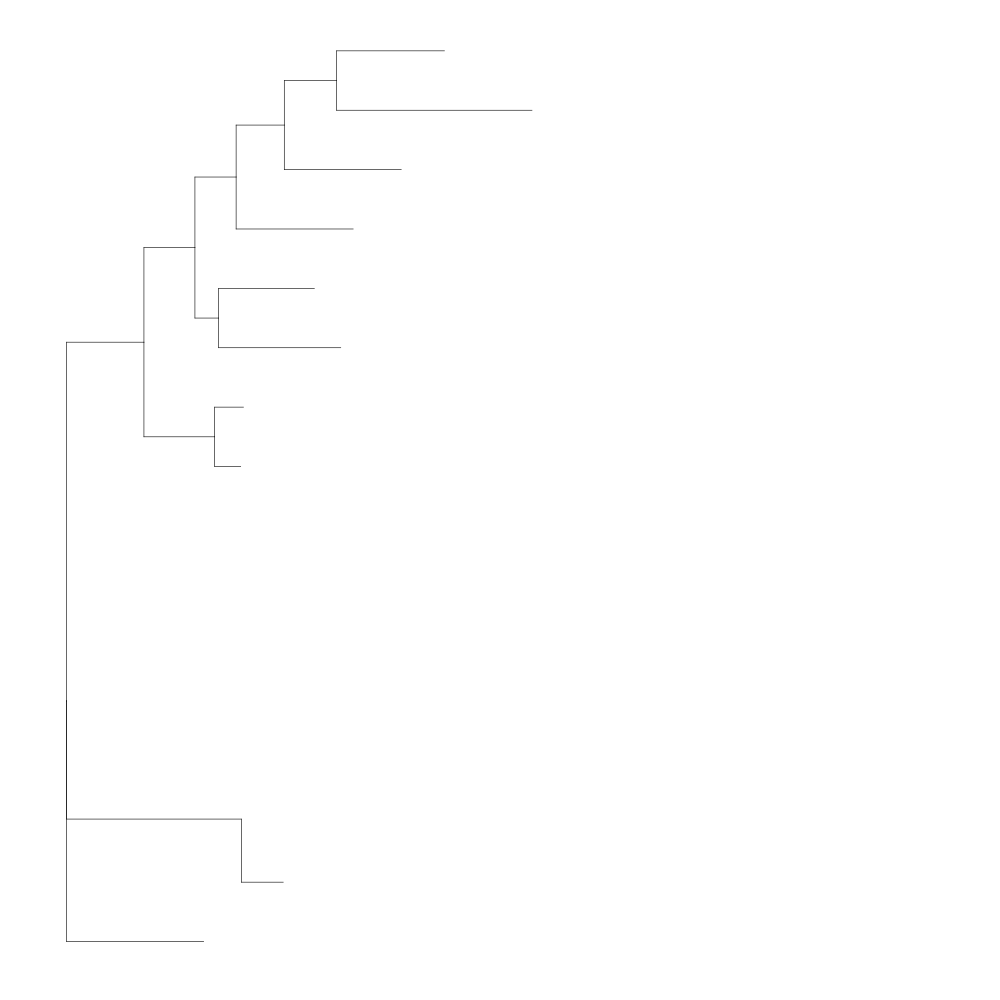

In [35]:
%%R -w 5 -h 5 --units in -r 200
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("ggtree", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
library(ggtree)
library(tidytree)
library(treeio)
tree_raxml <- read.tree("T3.raxml.support")

ggtree(tree_raxml, branch.length='dN_vs_dS', size=.1)+ xlim(0, 0.3)+
  geom_tiplab(align=TRUE, linetype='dashed', linesize=.3)+
  geom_nodelab(aes(label=label),size=1.5) #show bootstraps\
# Save as PDF 
#ggsave("ggtree.pdf", width = 10, height = 10, units = "cm")